<a href="https://colab.research.google.com/github/BibekUpadhyaya/MSD_IPL/blob/main/Cricket1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [36]:
#reading .csv files
df=pd.read_csv("/content/drive/MyDrive/deliveries_updated.csv")

In [37]:
df.head(2)

,matchId,inning,over_ball,over,ball,batting_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Step1:
df['isdot'] = df['batsman_runs'].apply(lambda x:1 if x==0 else 0)
df['isone'] = df['batsman_runs'].apply(lambda x:1 if x==1 else 0)
df['istwo'] = df['batsman_runs'].apply(lambda x:1 if x==2 else 0)
df['isthree'] = df['batsman_runs'].apply(lambda x:1 if x==3 else 0)
df['isfour'] = df['batsman_runs'].apply(lambda x:1 if x==4 else 0)
df['issix'] = df['batsman_runs'].apply(lambda x:1 if x==6 else 0)

In [39]:
df.head(10)

,matchId,inning,over_ball,over,ball,batting_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isdot,isone,istwo,isthree,isfour,issix
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
5,1082591,1,0.6,0,6,Sunrisers Hyderabad,S Dhawan,DA Warner,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
6,1082591,1,0.7,0,7,Sunrisers Hyderabad,S Dhawan,DA Warner,TS Mills,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1,0,0,0,0,0
7,1082591,1,1.1,1,1,Sunrisers Hyderabad,S Dhawan,DA Warner,A Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
8,1082591,1,1.2,1,2,Sunrisers Hyderabad,DA Warner,S Dhawan,A Choudhary,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
9,1082591,1,1.3,1,3,Sunrisers Hyderabad,DA Warner,S Dhawan,A Choudhary,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0


#Let's make the Data Frame of runs,balls,innings,dismissals one by one and combine them together


In [40]:
runs=pd.DataFrame(df[df.inning <=2].groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns={'batsman_runs':'runs'})
runs.head()

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4


In [41]:
balls=pd.DataFrame(df[df.inning <=2].groupby(['batsman'])['matchId'].count()).reset_index().rename(columns={'matchId':'balls'})
balls.head()

,batsman,balls
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5


In [42]:
dismissals=pd.DataFrame(df[df.inning <=2].groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns={'player_dismissed':'dismissals'})
dismissals.head()

,batsman,dismissals
0,A Ashish Reddy,15
1,A Chandila,1
2,A Chopra,5
3,A Choudhary,2
4,A Dananjaya,0


In [43]:
len(np.unique(df['matchId']))

876

In [44]:
innings=pd.DataFrame(df[df.inning <=2].groupby(['batsman'])['matchId'].apply(lambda x:len(np.unique(x)))).reset_index().rename(columns={'matchId':'innings'})
innings.head()

,batsman,innings
0,A Ashish Reddy,23
1,A Chandila,2
2,A Chopra,6
3,A Choudhary,3
4,A Dananjaya,1


In [45]:
#creating a DataFrame with groupby by batsman 
df1=pd.DataFrame(df[df.inning <=2].groupby(['batsman'])['isdot','isone','istwo','isthree','isfour','issix'].sum().reset_index().rename(columns = {'isdot':'dots','isone':'ones','istwo':'twos','isthree':'threes','isfour':'fours','issix':'sixes'}))
df1.head()

,batsman,dots,ones,twos,threes,fours,sixes
0,A Ashish Reddy,61,83,20,1,16,15
1,A Chandila,3,4,0,0,0,0
2,A Chopra,45,21,2,0,7,0
3,A Choudhary,4,13,1,0,1,1
4,A Dananjaya,2,2,1,0,0,0


In [46]:
df=pd.merge(innings,runs,on='batsman').merge(balls,on='batsman').merge(dismissals,on='batsman').merge(df1,on='batsman')
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15
1,A Chandila,2,4,7,1,3,4,0,0,0,0
2,A Chopra,6,53,75,5,45,21,2,0,7,0
3,A Choudhary,3,25,20,2,4,13,1,0,1,1
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0


Will now add more features like balls per dismissals i.e no of balls divided by no. of dismissals etc.

In [47]:
def balls_per_dismissals(balls,dismissals):
    if dismissals > 0:
       return balls/dismissals
    else:
        return balls/1


In [48]:
def balls_per_boundary(balls,boundaries):
    if boundaries > 0:
       return balls/boundaries
    else:
        return balls/1

In [49]:
def average(runs,dismissals):
    if dismissals > 0:
       return runs/dismissals
    else:
        return runs/1

In [50]:
def dot_percentage(dots,balls):
    if balls > 0:
       return (dots/balls)*100
    else:
       return dots/1   

In [51]:
#Strike Rate
df['SR']=df.apply(lambda x: 100*(x['runs']/x['balls']),axis=1)
#Runs_per_innings
df['RPI']=df.apply(lambda x: x['runs']/x['innings'],axis=1)
#balls_per_dismissals
df['BPD']=df.apply(lambda x:balls_per_dismissals(x['balls'],x['dismissals']),axis=1)
#balls_per_boundary
df['BPB']=df.apply(lambda x:balls_per_boundary(x['balls'],x['fours'] + x['sixes']),axis=1)
#average
df['average']=df.apply(lambda x:average(x['runs'],x['dismissals']),axis=1)
#dot%
df['dot_percentage']=df.apply(lambda x:dot_percentage(x['dots'],x['balls']),axis=1)

In [52]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581,18.666667,31.122449
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000,4.000000,42.857143
2,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286,10.600000,60.000000
3,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000,12.500000,20.000000
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000,4.000000,40.000000


#We will now extract the list of all orange cap holders and combine them in a Data Frame

In [53]:
df1=pd.DataFrame(df[df.batsman=='RD Gaikwad']).append(pd.DataFrame(df[df.batsman=='KL Rahul']))
df1

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
392,RD Gaikwad,22,839,647,18,237,260,38,3,80,29,129.675425,38.136364,35.944444,5.935780,46.611111,36.630603
243,KL Rahul,85,3273,2455,71,872,997,166,4,282,134,133.319756,38.505882,34.577465,5.901442,46.098592,35.519348


In [54]:
df2=pd.DataFrame(df[df.batsman=='DA Warner']).append(pd.DataFrame(df[df.batsman=='CH Gayle']))
df2

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
120,DA Warner,150,5449,4007,132,1516,1409,336,19,525,201,135.987023,36.326667,30.356061,5.519284,41.280303,37.833791
100,CH Gayle,141,4965,3502,127,1634,1012,91,3,405,357,141.776128,35.212766,27.574803,4.595801,39.094488,46.659052


In [55]:
df3=pd.DataFrame(df[df.batsman=='V Kohli']).append(pd.DataFrame(df[df.batsman=='KS Williamson']))
df3

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
527,V Kohli,199,6283,4956,177,1759,2064,360,15,547,211,126.775626,31.572864,28.000000,6.538259,35.497175,35.492333
250,KS Williamson,62,1885,1469,47,490,640,108,8,166,56,128.318584,30.403226,31.255319,6.617117,40.106383,33.356025


In [56]:
df4=pd.DataFrame(df[df.batsman=='SR Tendulkar']).append(pd.DataFrame(df[df.batsman=='ML Hayden']))
df4

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
474,SR Tendulkar,78,2334,2044,71,874,721,117,7,296,29,114.187867,29.923077,28.788732,6.289231,32.873239,42.759295
307,ML Hayden,32,1107,838,27,366,257,48,2,121,44,132.100239,34.593750,31.037037,5.078788,41.000000,43.675418


In [57]:
df5=pd.DataFrame(df[df.batsman=='SE Marsh']).append(pd.DataFrame(df[df.batsman=='RV Uthappa']))
df5

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
454,SE Marsh,69,2477,1908,64,734,724,99,6,266,78,129.821803,35.898551,29.812500,5.546512,38.703125,38.469602
417,RV Uthappa,186,4722,3744,173,1508,1368,222,13,462,168,126.121795,25.387097,21.641618,5.942857,27.294798,40.277778


In [58]:
df6=pd.DataFrame(df[df.batsman=='MEK Hussey'])
df6

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
296,MEK Hussey,58,1977,1648,52,643,648,96,11,198,52,119.963592,34.086207,31.692308,6.592,38.019231,39.01699


In [59]:
 req_df= pd.concat([df1,df2,df3,df4,df5,df6])
 req_df.reset_index(inplace=True,drop=True)
 req_df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,average,dot_percentage
0,RD Gaikwad,22,839,647,18,237,260,38,3,80,29,129.675425,38.136364,35.944444,5.935780,46.611111,36.630603
1,KL Rahul,85,3273,2455,71,872,997,166,4,282,134,133.319756,38.505882,34.577465,5.901442,46.098592,35.519348
2,DA Warner,150,5449,4007,132,1516,1409,336,19,525,201,135.987023,36.326667,30.356061,5.519284,41.280303,37.833791
3,CH Gayle,141,4965,3502,127,1634,1012,91,3,405,357,141.776128,35.212766,27.574803,4.595801,39.094488,46.659052
4,V Kohli,199,6283,4956,177,1759,2064,360,15,547,211,126.775626,31.572864,28.000000,6.538259,35.497175,35.492333


In [60]:
req_df.to_csv('orangecapholders.csv')

#Scatter Plot Visualization

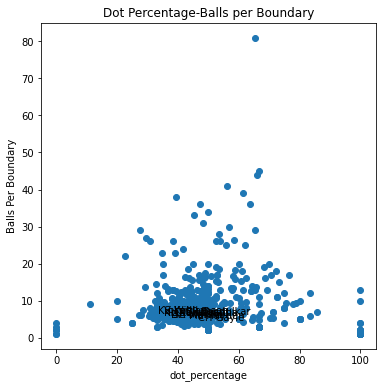

In [61]:
plt.figure(figsize = (6, 6))
plt.scatter(df['dot_percentage'], df['BPB'] )
plt.xlabel('dot_percentage')
plt.ylabel('Balls Per Boundary')
plt.title('Dot Percentage-Balls per Boundary')

annotations=list(df['batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'RD Gaikwad', 'DA Warner', 'KL Rahul', 'KS Williamson', 'SR Tendulkar','ML Hayden','SE Marsh','RV Uthappa','MEK Hussey	']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (df['dot_percentage'][i], df['BPB'][i]))
    
    
plt.show()

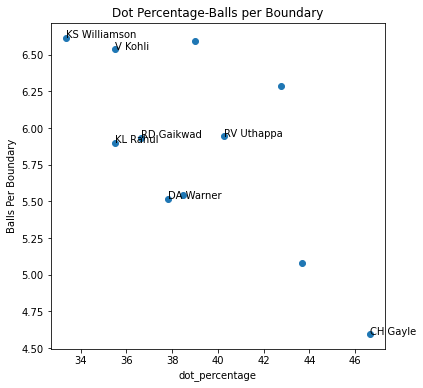

In [62]:
plt.figure(figsize = (6, 6))
plt.scatter(req_df['dot_percentage'], req_df['BPB'] )
plt.xlabel('dot_percentage')
plt.ylabel('Balls Per Boundary')
plt.title('Dot Percentage-Balls per Boundary')

annotations=list(req_df['batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'RD Gaikwad', 'DA Warner', 'KL Rahul', 'KS Williamson','RV Uthappa']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (req_df['dot_percentage'][i], req_df['BPB'][i]))
    
    
plt.show()

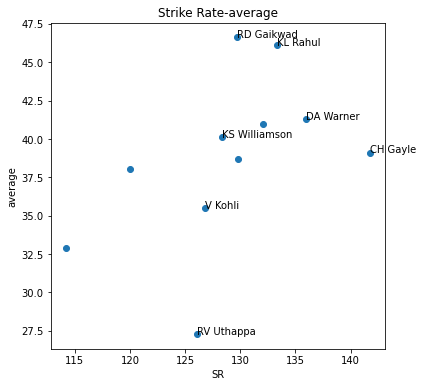

In [63]:
plt.figure(figsize = (6, 6))
plt.scatter(req_df['SR'], req_df['average'] )
plt.xlabel('SR')
plt.ylabel('average')
plt.title('Strike Rate-average')

annotations=list(req_df['batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'RD Gaikwad', 'DA Warner', 'KL Rahul', 'KS Williamson','RV Uthappa']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (req_df['SR'][i], req_df['average'][i]))
    
    
plt.show()

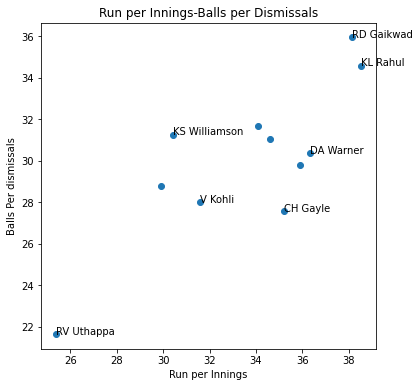

In [64]:
plt.figure(figsize = (6, 6))
plt.scatter(req_df['RPI'], req_df['BPD'] )
plt.xlabel('Run per Innings')
plt.ylabel('Balls Per dismissals')
plt.title('Run per Innings-Balls per Dismissals')

annotations=list(req_df['batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'RD Gaikwad', 'DA Warner', 'KL Rahul', 'KS Williamson','RV Uthappa']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (req_df['RPI'][i], req_df['BPD'][i]))
    
    
plt.show()

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
